<a href="https://colab.research.google.com/github/bmreiniger/datascience.stackexchange/blob/master/DS39213.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
np.random.seed(314)
X = np.random.normal(size=100).reshape(-1, 2)
X[:, 0] += 4
X[0, :] = [4,0]
y = np.ones(shape=(X.shape[0], 1))
# comment the next line out to get a separable dataset
# (assuming the normal sampling didn't give you an unlucky pull)
y[0] = -1  

X = np.vstack((X, -X))
y = np.vstack((y, -y))


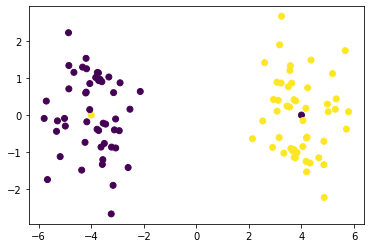

In [3]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y);

In [4]:
eta = 0.01
w = [1, 10]
w /= np.linalg.norm(w)
for iter in range(1000):
  error = sum(max(0, -y[i]*np.dot(w, X[i, :])) for i in range(len(y)))
  print(w, error)
  w += eta * sum([y[i]*X[i,:] if y[i]*np.dot(w, X[i,:]) < 0 else 0 for i in range(len(y))])
  w /= np.linalg.norm(w)


[0.09950372 0.99503719] [26.58413396]
[0.9391015 0.3436399] [7.51281196]
[0.92847695 0.37139003] [7.4278156]
[0.91608542 0.40098318] [7.32868332]
[0.90166513 0.43243495] [7.21332107]
[0.88492727 0.46572924] [7.07941816]
[0.86555741 0.50080971] [6.92445928]
[0.84321899 0.53757021] [6.74575194]
[0.81755922 0.57584453] [6.54047375]
[0.78821804 0.61539607] [6.3057443]
[0.75484069 0.65590817] [6.03872555]
[0.7170942  0.69697626] [5.73675359]
[0.67468772 0.7381033 ] [5.39750179]
[0.62739641 0.77870004] [5.01917124]
[0.57508742 0.81809196] [4.60069938]
[0.51774642 0.85553413] [4.14197138]
[0.45550161 0.89023496] [3.64401285]
[0.38864228 0.92138872] [3.41942203]
[0.42005811 0.90749721] [3.36046492]
[0.35089425 0.93641509] [3.55142005]
[0.38153634 0.92435384] [3.44487616]
[0.41281746 0.91081378] [3.33066056]
[0.44465202 0.8957034 ] [3.55721619]
[0.37706259 0.92618778] [3.46075569]
[0.40825626 0.91286737] [3.34766668]
[0.44001658 0.89798965] [3.52013267]
[0.37212187 0.92818388] [3.47816281]
[0.4

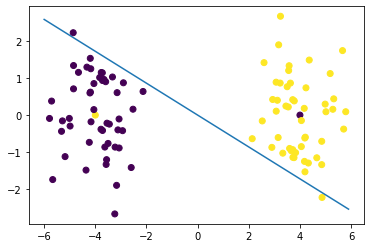

In [5]:
xx = np.arange(-6, 6, 0.1)
yy = -w[0]*xx/w[1]
plt.plot(xx, yy)
plt.scatter(X[:, 0], X[:, 1], c=y);

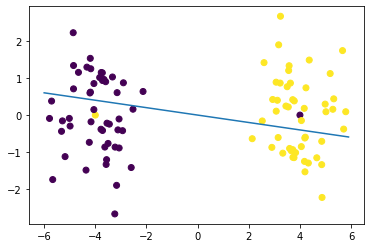

In [14]:
import matplotlib.animation as animation

eta = 0.001
n_iter = 100
w = [1, 10]
w /= np.linalg.norm(w)

fig, ax = plt.subplots()
line, = ax.plot(xx, -w[0]*xx/w[1])
plt.scatter(X[:,0], X[:,1], c=y);

def init():  # only required for blitting to give a clean slate.
  global w
  line.set_ydata(-w[0]*xx/w[1])
  return line,

def animate(i):
  global w
  # hack to make the saved gif delay between plays: don't update for a few frames
  if i < n_iter:
    w += eta * sum([y[i]*X[i,:] if y[i]*np.dot(w, X[i,:]) < 0 else 0 for i in range(len(y))])
    w /= np.linalg.norm(w)
  line.set_ydata(-w[0]*xx/w[1])
  return line,

ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=200, repeat_delay=5000, blit=True, save_count=n_iter+10);

# To play the animation in the notebook:
# from IPython.display import HTML
# HTML(ani.to_jshtml())

# or see below to save the animation to gif.
# (Be careful not to run both, or the gradient descent will have already started.)

In [7]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.8).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [15]:
ani.save('small_learning_rate.gif', writer='imagemagick', fps=None)